In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Loading DataSet

In [2]:
df = pd.read_csv("AirBnB_original.csv")


In [3]:
df.head()
df.describe()

,id,host id,lat,long,instant bookable,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
count,7.270900e+04,7.270900e+04,72701.000000,72701.00000,72709.0,72563.000000,72709.000000,72552.000000,72397.000000,72615.000000,72466.000000,72504.000000,72709.000000
mean,2.822362e+07,4.915231e+10,40.727697,-73.94817,0.0,2012.490856,625.244041,125.033066,3.403939,33.077697,3.291889,9.866214,1.449119
std,1.596755e+07,2.851970e+10,0.057033,0.05239,0.0,5.770828,331.187737,66.232569,2.276835,53.707868,1.277752,36.990501,0.801373
min,1.001254e+06,1.297566e+08,40.499790,-74.24984,0.0,2003.000000,50.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.459510e+07,2.448424e+10,40.687770,-73.98312,0.0,2008.000000,340.000000,68.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.843629e+07,4.889969e+10,40.722540,-73.95398,0.0,2012.000000,625.000000,125.000000,3.000000,11.000000,3.000000,1.000000,1.000000
75%,4.136894e+07,7.380985e+10,40.762920,-73.92987,0.0,2018.000000,912.000000,182.000000,5.000000,41.000000,4.000000,3.000000,2.000000
max,5.736742e+07,9.876268e+10,40.916970,-73.70522,0.0,2022.000000,1200.000000,240.000000,7.000000,1010.000000,5.000000,332.000000,4.000000


###  Missing Values

In [4]:
df.isnull().sum()

id                                  0
host id                             0
neighborhood group                  0
neighborhood                       12
lat                                 8
long                                8
country                           371
country code                       86
instant bookable                    0
cancellation policy                45
room type                           0
construction year                 146
price                               0
service fee                       157
minimum nights                    312
number of reviews                  94
review rate number                243
calculated host listings count    205
number rooms                        0
dtype: int64

In [5]:
No_NaN_df = df.dropna()


### Duplicate Values

In [6]:
Non_Dup_df = No_NaN_df.drop_duplicates("id", keep = "last")


In [7]:
### Preparation of Data set is completed.  From Now on working on Cleaned dats set which is already present 

In [8]:
#### Exploratory Data Analysis

cd = pd.read_csv("AirBnB_cleaned.csv")
## Check correlation for float datatypes

#### Exploring Price relationships

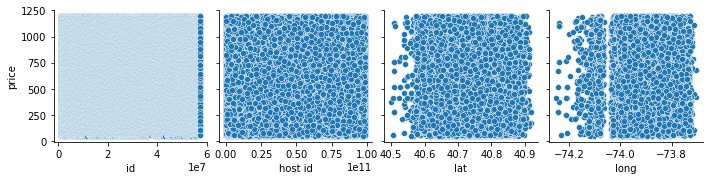

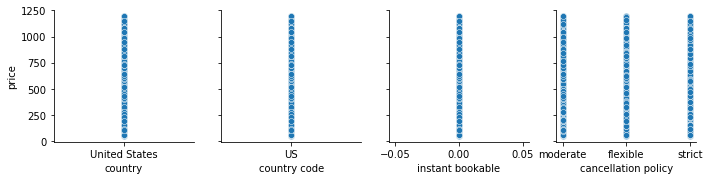

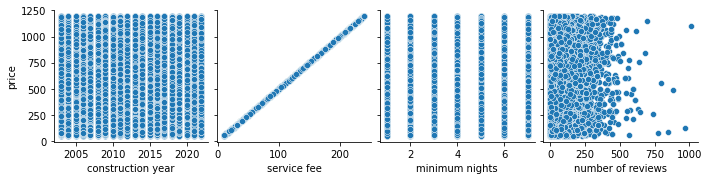

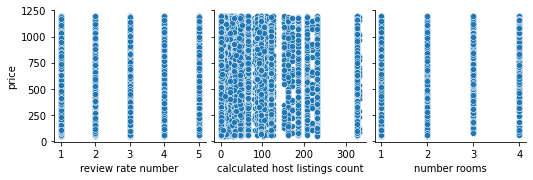

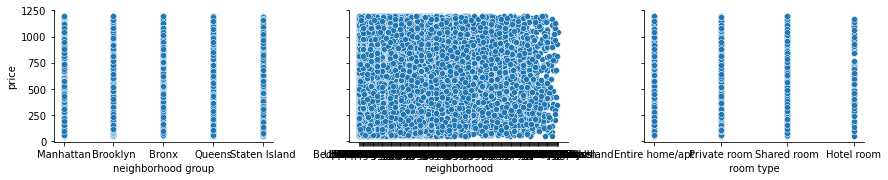

In [9]:
sns.pairplot(cd, x_vars= ['id', 'host id','lat', 'long'],y_vars='price', height=2.5)
plt.show()

sns.pairplot(cd, x_vars= ['country','country code','instant bookable','cancellation policy'],y_vars='price', height=2.5)
plt.show()

sns.pairplot(cd, x_vars= ['construction year','service fee','minimum nights','number of reviews'],y_vars='price', height=2.5)
plt.show()

sns.pairplot(cd, x_vars= ['review rate number', 'calculated host listings count','number rooms'],y_vars='price', height=2.5)
plt.show()

sns.pairplot(cd, x_vars= ['neighborhood group' ,'neighborhood','room type'],y_vars='price', height=2.5, aspect=2.5/1.5)
plt.show()

#### Univariate Analysis of  features

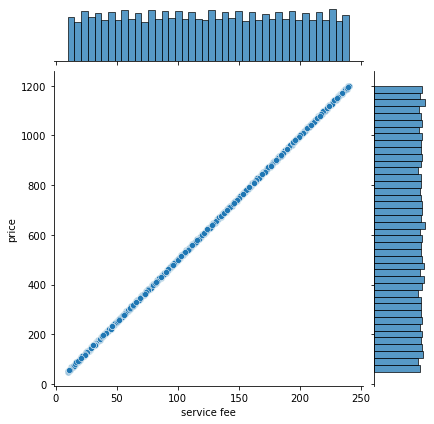

In [10]:
sns.jointplot(data=cd, x="service fee", y="price")
plt.show()

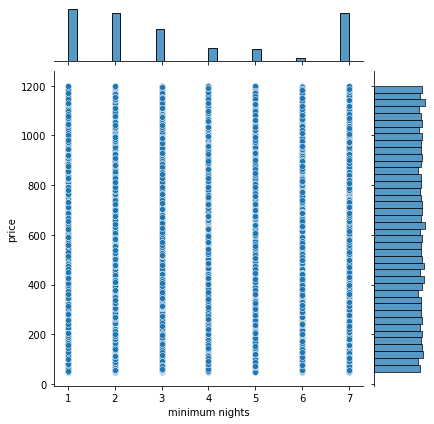

In [11]:
sns.jointplot(data=cd, x='minimum nights', y='price')
plt.show()

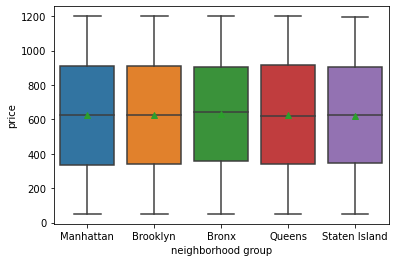

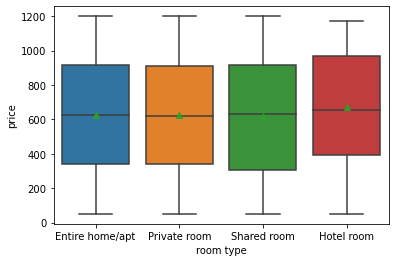

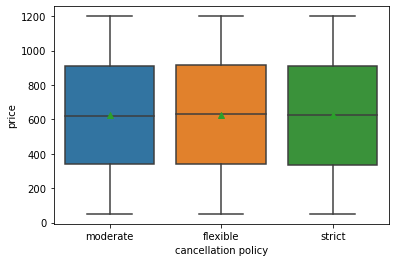

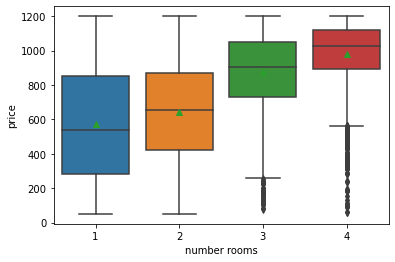

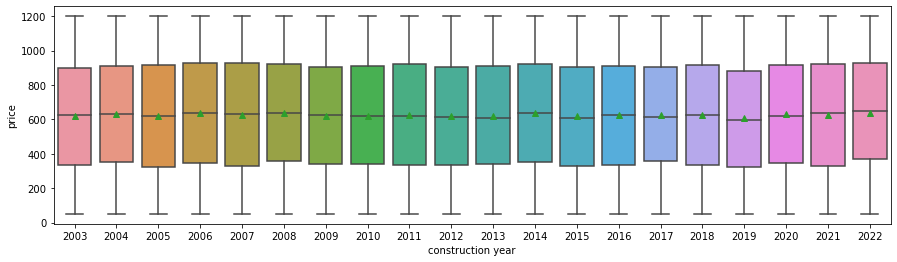

In [12]:
plt.rcParams['figure.figsize']=(6,4)
sns.boxplot(data=cd, x='neighborhood group', y='price', showmeans=True)
plt.show()

sns.boxplot(data=cd, x='room type', y='price',showmeans=True)
plt.show()

sns.boxplot(data=cd, x='cancellation policy', y='price',showmeans=True)
plt.show()

sns.boxplot(data=cd, x='number rooms', y='price',showmeans=True)
plt.show()


plt.rcParams['figure.figsize']=(15,4)
sns.boxplot(data=cd, x='construction year', y='price',showmeans=True)
plt.show()

In [13]:
#### Check Multivariate Analysis Concepts in selection of features

In [14]:
#### Selected features are Service fee, number of rooms, Neighborhood group, room type

In [15]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70842 entries, 0 to 70841
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              70842 non-null  int64  
 1   host id                         70842 non-null  int64  
 2   neighborhood group              70842 non-null  object 
 3   neighborhood                    70842 non-null  object 
 4   lat                             70842 non-null  float64
 5   long                            70842 non-null  float64
 6   country                         70842 non-null  object 
 7   country code                    70842 non-null  object 
 8   instant bookable                70842 non-null  int64  
 9   cancellation policy             70842 non-null  object 
 10  room type                       70842 non-null  object 
 11  construction year               70842 non-null  int64  
 12  price                           

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

X = cd.loc[:,['number rooms','minimum nights','service fee', 'neighborhood group', 'room type', 'review rate number']]
y = cd.loc[:,['price']]


X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.05, random_state=42)

X_train.head()

,number rooms,minimum nights,service fee,neighborhood group,room type,review rate number
14511,1,2,44,Manhattan,Private room,1
32127,2,2,154,Brooklyn,Entire home/apt,4
34402,1,3,167,Manhattan,Private room,2
51675,1,7,91,Queens,Shared room,2
69390,4,5,208,Brooklyn,Entire home/apt,2


In [17]:
### Standardize Dataset and Onehotencoding for categorial data
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
#X_train_ohe = pd.get_dummies(X_train)
#X_test_ohe = pd.get_dummies(X_test)
preprocessor = OneHotEncoder(handle_unknown="ignore")

X_train_ohe = preprocessor.fit_transform(X_train)
X_test_ohe = preprocessor.transform(X_test)

normalizer = Normalizer()

X_train_norm = normalizer.fit_transform(X_train_ohe)
X_test_norm = normalizer.transform(X_test_ohe)


### Model Training

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression()

In [20]:
regression.fit(X_train_norm, y_train)

LinearRegression()

In [21]:
reg_pred = regression.predict(X_test_norm)
reg_pred

array([[800.12478276],
       [279.92864267],
       [919.93751097],
       ...,
       [970.19678974],
       [580.08939219],
       [395.01047867]])

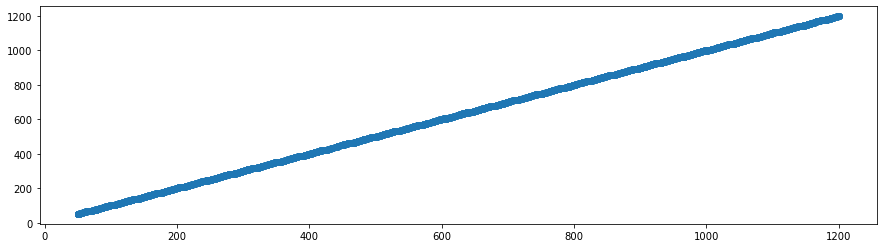

In [22]:
### Scatter plot for pred

plt.scatter(y_test, reg_pred)

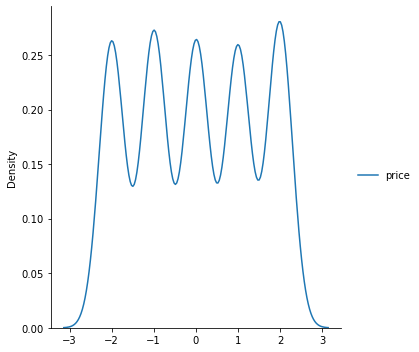

In [23]:
residuals = y_test - reg_pred

## Ploting Residual
sns.displot(residuals, kind='kde')

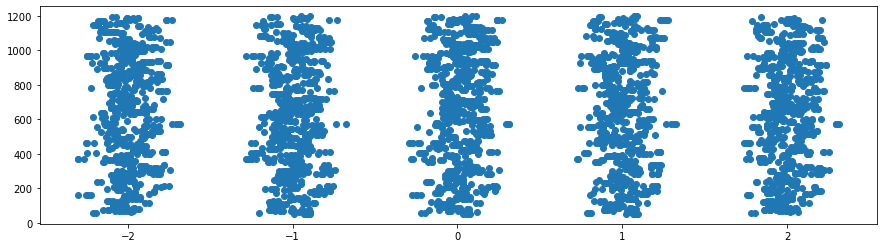

In [24]:
### Scatter plot with Prediction and residuals 
plt.scatter(residuals, reg_pred)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))


2.0267312011570735
1.2249208353008112


### R square and adjusted R square

In [26]:
from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)
print(score)

0.9999814688015977


#### Adjusted R square = 1- [(1-R2)*(n-1)/(n-k-1)]

In [27]:
Adjusted_Score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(Adjusted_Score)

0.9999814373572565


### New Data Prediction

In [28]:
a = cd.loc[:,['number rooms','minimum nights','service fee', 'neighborhood group', 'room type', 'review rate number']].iloc[0]
b = np.array(a).reshape(1,-1)
c = preprocessor.transform(b)
ND = normalizer.transform(c)
regression.predict(ND)


array([[139.9183747]])

### Pickling the Model file for Deployment

In [29]:
import pickle

In [30]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [31]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [32]:
### Prediction
pickled_model.predict(ND)

array([[139.9183747]])